In [1]:
import sys
import SimpleITK as sitk
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline 
import numpy as np
import os
import fnmatch
import shutil
from ipywidgets import interact, fixed
import pandas as pd
import warnings
from skimage import exposure
from skimage import data
from skimage.transform import rotate
import _pickle as cPickle
import random
from sklearn.model_selection import train_test_split #GREAT for model selection!!!!!!!!

def myshow(image_arr,slice_n):
    plt.imshow(image_arr[slice_n,:,:],cmap='gray')
    plt.show()

In [2]:
#reading corresponding dataframes with arrays 

t2_df=pd.read_pickle('./t2_augmented.pkl')
adc_df=pd.read_pickle('./adc_augmented.pkl')
bval_df=pd.read_pickle('./bval_augmented.pkl')
ktrans_df=pd.read_pickle('./ktrans_augmented.pkl')

In [3]:
#function to get zero-mean unit variance 

def get_optimized(data):
    
    for i in range(len(data)):
        array = data.loc[i, 'patches']
        optimized = (array - array.mean(axis=0)) / array.std(axis=0)
        data.at[i, 'patches']=optimized
    return data


t2_o = get_optimized(t2_df)    
adc_o = get_optimized(adc_df)
bval_o = get_optimized(bval_df)
ktrans_o = get_optimized(ktrans_df)


/home/andrii/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


### Once we have all data optimized it is time to get all our images to arrays



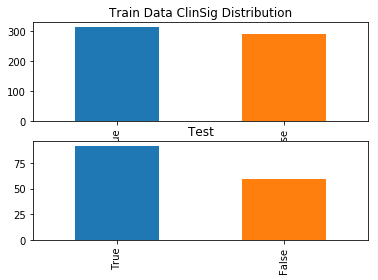

In [95]:
#before getting our arrays, we should divide them into train and test dataframes

train, test = train_test_split(t2_o, test_size=0.2) #we`ll have 80% for model training and 20% of samples for model val

#in ordder to get training/testing datasets let`s check our distribution 
plt.figure(1)

plt.subplot(2,1,1)
train.ClinSig.value_counts().plot(kind='bar', title='Train Data ClinSig Distribution')

plt.subplot(2,1,2)
test.ClinSig.value_counts().plot(kind='bar', title='Test')

#we have adequate distribution among clinical outcome 

In [96]:
#Get array of images from column

def get_arrays(data, column=['patches', 'ClinSig']):
    
    x= np.array([i for i in data[column[0]]]) #array of images
    y=np.array([i for i in data[column[1]]])#array for labels
    
    return x,y 



x_train, y_train = get_arrays(train)
x_test, y_test = get_arrays(test)



In [10]:
#once we get adequately balanced datasets we can right them top the disk fopr further analysis




t2_o.to_pickle('./t2_optimized.pkl')
adc_o.to_pickle('./adc_optimized.pkl')
bval_o.to_pickle('./bval_optimized.pkl')
ktrans_o.to_pickle('./ktrans_optimized.pkl')